In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report,accuracy_score,confusion_matrix
from sklearn.feature_selection import mutual_info_classif

from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB

from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression 
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error,r2_score



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

from tensorflow.keras.optimizers import Adam

In [2]:
pd.pandas.set_option("display.max_columns",None)
data = pd.read_csv("data.csv",delimiter=",")
data

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,android.permission.DOWNLOAD_WITHOUT_NOTIFICATION,android.permission.GET_TASKS,android.permission.WRITE_EXTERNAL_STORAGE,android.permission.RECORD_AUDIO,com.huawei.android.launcher.permission.CHANGE_BADGE,com.oppo.launcher.permission.READ_SETTINGS,android.permission.CHANGE_NETWORK_STATE,com.android.launcher.permission.INSTALL_SHORTCUT,android.permission.android.permission.READ_PHONE_STATE,android.permission.CALL_PHONE,android.permission.WRITE_CONTACTS,android.permission.READ_PHONE_STATE,com.samsung.android.providers.context.permission.WRITE_USE_APP_FEATURE_SURVEY,android.permission.MODIFY_AUDIO_SETTINGS,android.permission.ACCESS_LOCATION_EXTRA_COMMANDS,android.permission.INTERNET,android.permission.MOUNT_UNMOUNT_FILESYSTEMS,com.majeur.launcher.permission.UPDATE_BADGE,android.permission.AUTHENTICATE_ACCOUNTS,com.htc.launcher.permission.READ_SETTINGS,android.permission.ACCESS_WIFI_STATE,android.permission.FLASHLIGHT,android.permission.READ_APP_BADGE,android.permission.USE_CREDENTIALS,android.permission.CHANGE_CONFIGURATION,android.permission.READ_SYNC_SETTINGS,android.permission.BROADCAST_STICKY,com.anddoes.launcher.permission.UPDATE_COUNT,com.android.alarm.permission.SET_ALARM,com.google.android.c2dm.permission.RECEIVE,android.permission.KILL_BACKGROUND_PROCESSES,com.sonymobile.home.permission.PROVIDER_INSERT_BADGE,com.sec.android.provider.badge.permission.READ,android.permission.WRITE_CALENDAR,android.permission.SEND_SMS,com.huawei.android.launcher.permission.WRITE_SETTINGS,android.permission.REQUEST_INSTALL_PACKAGES,android.permission.SET_WALLPAPER_HINTS,android.permission.SET_WALLPAPER,com.oppo.launcher.permission.WRITE_SETTINGS,android.permission.RESTART_PACKAGES,me.everything.badger.permission.BADGE_COUNT_WRITE,android.permission.ACCESS_MOCK_LOCATION,android.permission.ACCESS_COARSE_LOCATION,android.permission.READ_LOGS,com.google.android.gms.permission.ACTIVITY_RECOGNITION,com.amazon.device.messaging.permission.RECEIVE,android.permission.SYSTEM_ALERT_WINDOW,android.permission.DISABLE_KEYGUARD,android.permission.USE_FINGERPRINT,me.everything.badger.permission.BADGE_COUNT_READ,android.permission.CHANGE_WIFI_STATE,android.permission.READ_CONTACTS,com.android.vending.BILLING,android.permission.READ_CALENDAR,android.permission.RECEIVE_BOOT_COMPLETED,android.permission.WAKE_LOCK,android.permission.ACCESS_FINE_LOCATION,android.permission.BLUETOOTH,android.permission.CAMERA,com.android.vending.CHECK_LICENSE,android.permission.FOREGROUND_SERVICE,android.permission.BLUETOOTH_ADMIN,android.permission.VIBRATE,android.permission.NFC,android.permission.RECEIVE_USER_PRESENT,android.permission.CLEAR_APP_CACHE,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29332 entries, 0 to 29331
Data columns (total 87 columns):
 #   Column                                                                         Non-Null Count  Dtype
---  ------                                                                         --------------  -----
 0   android.permission.GET_ACCOUNTS                                                29332 non-null  int64
 1   com.sonyericsson.home.permission.BROADCAST_BADGE                               29332 non-null  int64
 2   android.permission.READ_PROFILE                                                29332 non-null  int64
 3   android.permission.MANAGE_ACCOUNTS                                             29332 non-null  int64
 4   android.permission.WRITE_SYNC_SETTINGS                                         29332 non-null  int64
 5   android.permission.READ_EXTERNAL_STORAGE                                       29332 non-null  int64
 6   android.permission.RECEIVE_SMS        

We can observe that there are no null values in any columns, let try to visualise this

[Text(0.5, 50.09375, 'Column Names'),
 Text(87.0, 0.5, 'Missing Values'),
 Text(0.5, 1.0, 'Heat Map of the Dataset for missing values')]

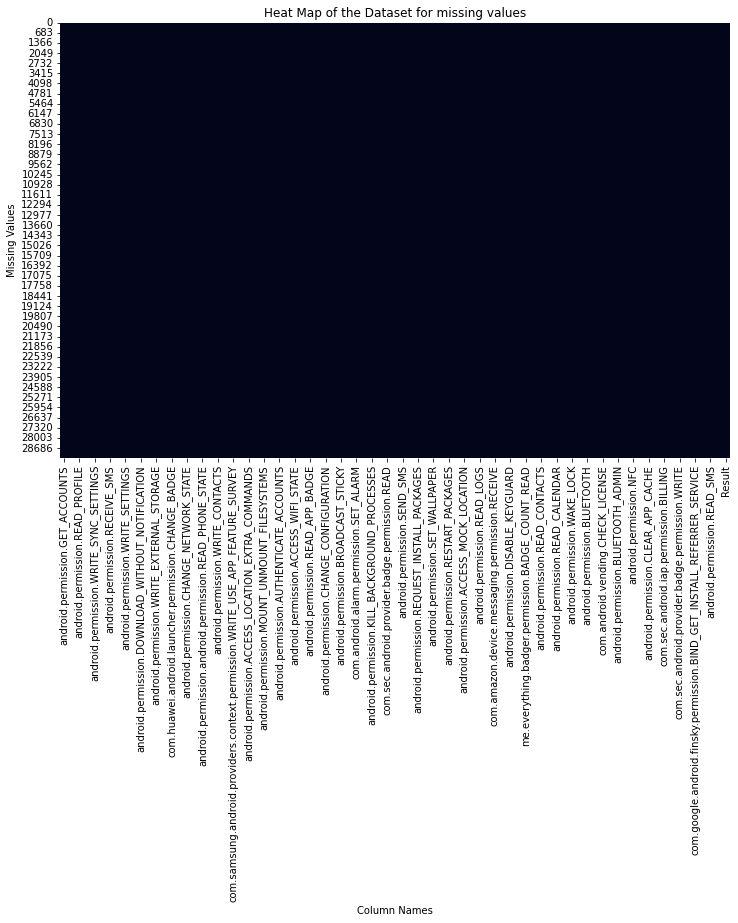

In [26]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)
heat =sns.heatmap(data.isnull(), cbar=False)
heat.set(xlabel ="Column Names", ylabel = "Missing Values", title ='Heat Map of the Dataset for missing values')

(14632, 14700)

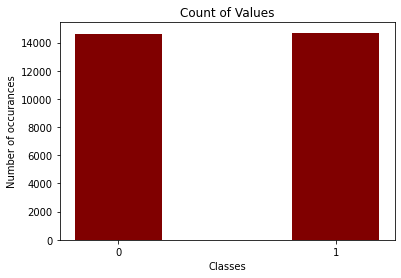

In [27]:
## we have to check if the data is balanced or not

count_0 =0
count_1 = 0
for i in data["Result"]:
    if i == 0:
        count_0+=1
    else:
        count_1+=1
plt.bar(['0','1'],[count_0,count_1],color ='maroon',width = 0.4)
plt.xlabel("Classes")
plt.ylabel("Number of occurances")
plt.title("Count of Values")
count_0,count_1

The data is balanced

In [72]:
columns = data.columns
#columns

In [29]:
columns =[]
column_dictionary = {}
for i in range(len(data.columns)-1):
    column_dictionary[i]=data.columns[i] ## mapping the column names to numbers
    columns.append(i)
columns.append('Result')
data.columns = columns


In [30]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,Result
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29327,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
29328,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
29329,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
29330,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Train Test Split

In [31]:
X = data.drop("Result",axis=1)
y = data.Result

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state= 10, shuffle = True)


X.shape,y.shape,X_train.shape,y_train.shape,X_test.shape,y_test.shape #,X_val.shape,y_val.shape

((29332, 86), (29332,), (20532, 86), (20532,), (8800, 86), (8800,))

In [33]:
from sklearn.model_selection import StratifiedKFold


# the following piece of code was adopted from https://www.youtube.com/watch?v=fKz-SgScM3Q&t=600s

def stratified_cross_validation(model,X,y):
    accuracy = []
    
    cross = StratifiedKFold(n_splits=5,random_state=None)
    
    cross.get_n_splits(X,y)

    for test_index,train_index in cross.split(X,y):
        X_train1,X_test1 = X.iloc[train_index], X.iloc[test_index]
        y_train1,y_test1 = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train1,y_train1)
        prediction = model.predict(X_test1)
        score = accuracy_score(prediction,y_test1)
        accuracy.append(score)


    
    
    return accuracy,model
    






In [34]:
accuracy,model = stratified_cross_validation(RandomForestClassifier(),X_train,y_train) ## creating our base line with RandomForestClassifier()

[0.9645053272450532, 0.9626788432267884, 0.9635943017167905, 0.9614026543285036, 0.9646292463168148]


In [38]:
average(accuracy)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9633621>

In [40]:
y_prediction=model.predict(X_test)
print("\n Classification Report of baseline Random Forest Classifier\n\n",classification_report(y_test,y_prediction))


 Classification Report of baseline Random Forest Classifier

               precision    recall  f1-score   support

           0       0.97      0.96      0.97      4381
           1       0.97      0.97      0.97      4419

    accuracy                           0.97      8800
   macro avg       0.97      0.97      0.97      8800
weighted avg       0.97      0.97      0.97      8800



In [41]:
from sklearn.model_selection import GridSearchCV

def grid_search(parameters,classifier,X,y):
  
                               param_grid = parameters,
                               scoring = 'accuracy',
                               cv = 10,
                               n_jobs = -1)
    grid_search = grid_search.fit(X, y)
    
    return grid_search.best_params_

In [43]:
parameters = [{'n_estimators': [100,200,250,1000],'max_features':['auto''sqrt', 'log2', None],'min_samples_split':[1,2,4,6]}]
best_random = grid_search(parameters,RandomForestClassifier(),X_train,y_train)

parameters = [{'hidden_layer_sizes':[(100,),(100,100,50),(100,100,100)],'learning_rate' : ['constant', 'adaptive'],'momentum':[0.5,0.6,0.7],'max_iter':[1000],'verbose':[True]}]
best_mlp = grid_search(parameters, MLPClassifier(),X_train,y_train)

parameters=[{'C':[1,10,50,100,1000],'kernel':['linear']},{'C':[1,10,50,100,1000],'kernel':['rbf','poly','sigmoid'],'gamma':['scale','auto']}]
best_svc = grid_search(parameters, SVC(),X_train,y_train)
best_random,best_mlp,best_svc

C:\Python3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Python3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Python3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispat

Iteration 1, loss = 0.38004437
Iteration 2, loss = 0.15565974
Iteration 3, loss = 0.13112371
Iteration 4, loss = 0.12380007
Iteration 5, loss = 0.11953890
Iteration 6, loss = 0.11694723
Iteration 7, loss = 0.11465279
Iteration 8, loss = 0.11181410
Iteration 9, loss = 0.10983710
Iteration 10, loss = 0.10788459
Iteration 11, loss = 0.10611129
Iteration 12, loss = 0.10417899
Iteration 13, loss = 0.10227662
Iteration 14, loss = 0.10026222
Iteration 15, loss = 0.09878855
Iteration 16, loss = 0.09701639
Iteration 17, loss = 0.09576762
Iteration 18, loss = 0.09448893
Iteration 19, loss = 0.09308498
Iteration 20, loss = 0.09163617
Iteration 21, loss = 0.09051302
Iteration 22, loss = 0.08951483
Iteration 23, loss = 0.08868167
Iteration 24, loss = 0.08764434
Iteration 25, loss = 0.08694843
Iteration 26, loss = 0.08604023
Iteration 27, loss = 0.08539607
Iteration 28, loss = 0.08459832
Iteration 29, loss = 0.08341519
Iteration 30, loss = 0.08323141
Iteration 31, loss = 0.08201366
Iteration 32, los

({'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 250},
 {'hidden_layer_sizes': (100,),
  'learning_rate': 'constant',
  'max_iter': 1000,
  'momentum': 0.5,
  'verbose': True},
 {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'})

# Final Models

In [46]:
Algorithms=[MLPClassifier(hidden_layer_sizes=best_mlp['hidden_layer_sizes'],learning_rate=best_mlp['learning_rate'],momentum=best_mlp['momentum'],max_iter=best_mlp['max_iter']),
            RandomForestClassifier(max_features=best_random['max_features'], min_samples_split=best_random['min_samples_split'], n_estimators=best_random['n_estimators']),
            SVC(C= best_svc['C'], gamma=best_svc['gamma'], kernel=best_svc['kernel'])] ##list of algorithms the are used for the model
Names=["MLP Classifier","RandomForestClassifier","SVC Classifier"]

In [65]:
from sklearn.metrics import f1_score

accuracy_dict={}
f1_dict = {}

# the following piece of code was adopted from a different submission of mine (Machine Learning)
for i in range(len(Algorithms)):
    print("                      ",Names[i])
    accuracy,model = stratified_cross_validation(Algorithms[i],X_train,y_train)
    
    y_prediction=model.predict(X_test)
    
    acc=accuracy_score(y_test,y_prediction)
    f1= f1_score(y_test,y_prediction)
    
    accuracy_dict[Names[i]]=acc
    f1_dict[Names[i]] = f1
    print("Accuracy =",acc*100)
    
    print("\n Classification Report\n\n",classification_report(y_test,y_prediction))
    
    print("\n Confusion Matrix\n\n",confusion_matrix(y_test,y_prediction))
    
    print("************************************************************************************************")
    
    
    

                       MLP Classifier
[0.9592085235920852, 0.9614611872146118, 0.9612200170461463, 0.9601850724461221, 0.962498478022647]
Accuracy = 96.39772727272728

 Classification Report

               precision    recall  f1-score   support

           0       0.96      0.97      0.96      4381
           1       0.97      0.96      0.96      4419

    accuracy                           0.96      8800
   macro avg       0.96      0.96      0.96      8800
weighted avg       0.96      0.96      0.96      8800


 Confusion Matrix

 [[4247  134]
 [ 183 4236]]
************************************************************************************************
                       RandomForestClassifier
[0.9651750380517504, 0.9633485540334855, 0.9645074881285767, 0.9615852916108608, 0.965481553634482]
Accuracy = 96.81818181818181

 Classification Report

               precision    recall  f1-score   support

           0       0.97      0.97      0.97      4381
           1       0.97  

In [67]:
accuracy_dict

{'MLP Classifier': 0.9639772727272727,
 'RandomForestClassifier': 0.9681818181818181,
 'SVC Classifier': 0.9629545454545455}

In [68]:
f1_dict

{'MLP Classifier': 0.9639321879622256,
 'RandomForestClassifier': 0.968361581920904,
 'SVC Classifier': 0.9630553037171351}

In [70]:
dictionaries = [accuracy_dict,f1_dict]

[0.9629545454545455, 0.9639772727272727, 0.9681818181818181]
0.9629545454545455
SVC Classifier
0.9639772727272727
MLP Classifier
0.9681818181818181
RandomForestClassifier


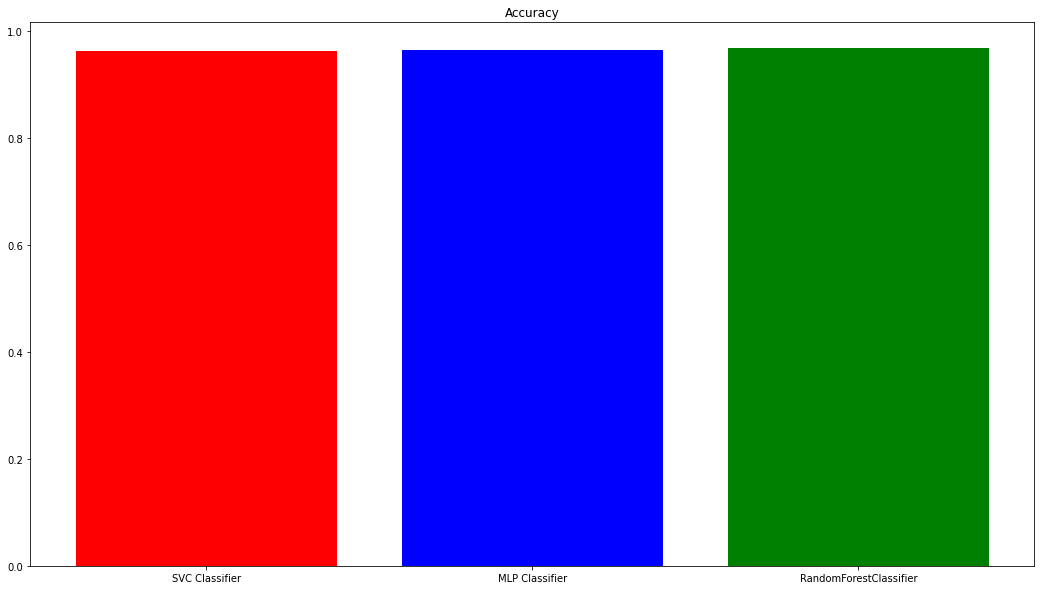

[0.9630553037171351, 0.9639321879622256, 0.968361581920904]
0.9630553037171351
SVC Classifier
0.9639321879622256
MLP Classifier
0.968361581920904
RandomForestClassifier


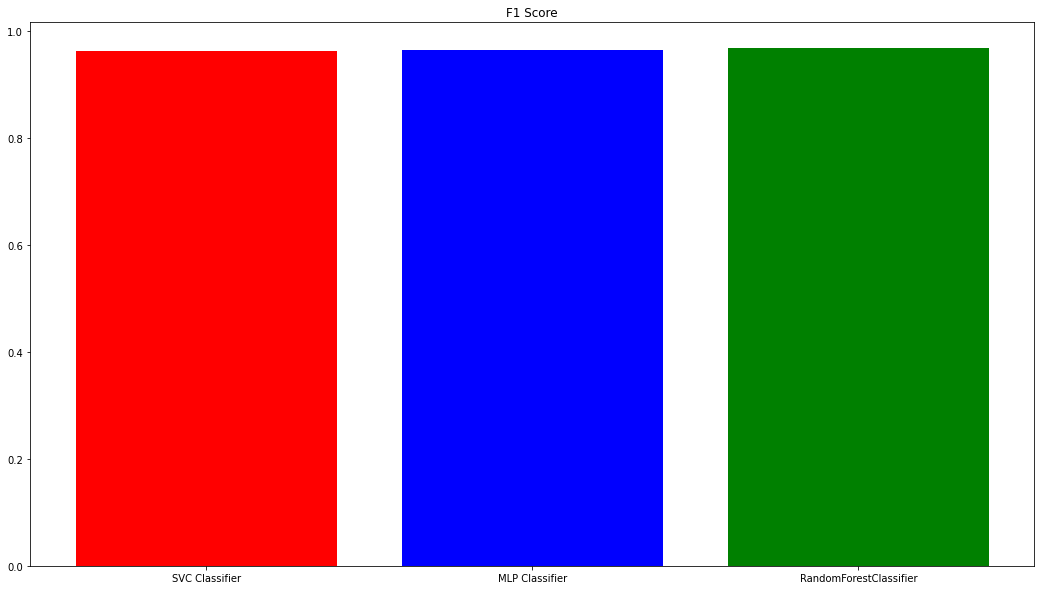

In [71]:
# plotting the graphs

names =[]
values = []
for item in dictionaries:
    sorted_values = sorted(item.values()) # Sorting the dictionary by the values
    sorted_dict = {}
    
    print(sorted_values)

    for i in sorted_values:
        for k in item.keys():
            if item[k] == i:
                print(item[k])
                print(k)
                sorted_dict[k] = item[k]
                break
    item=sorted_dict
    names = list(item.keys())
    #print(names)
    values = list(item.values())
    #print(values)
    if len(values) == 2:
        values.insert(0,values[0])
    #print(values)
    plt.figure(figsize=(18,10))
    colors = ['r','b','g']
    plt.bar(range(len(item)), values, tick_label=names,color=colors)
    if item==accuracy_dict:
        plt.title('Accuracy')
    else:
        plt.title('F1 Score')
    plt.show()